In [63]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Итоговое задание

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

Условия применения дисперсионного анализа:
1. Независимость измерений
2. Значения групп должны следовать нормальному распределению
3. Однородность (равенство дисперсий). Если размеры выборок одинаковы - неоднородность дисперсий слабо влияет на результат.

In [64]:
football_players = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey_players = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
weightlifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

## Решение
Проверяем условие применимости дисперсионного анализа:
1. Независмиость выборок - выборки независимы



2. Проверяем значения групп на нормальное распределение

    2а.Применяем критерий Шапиро-Уилка и интерпритируем результат:
    H0 - выборка распределена нормально
    H1 - выборка не подчиняется нормальному распределению

In [65]:
alpha_1 = 0.05
def compare(alpha,p_value):
    if p_value>alpha:
        print("Принимается гипотеза H0, выборка распределена нормально")
    else:
        print("Принимается гипотеза H1, выборка не подчиняется нормальному распределению")

In [66]:
football_players_result = st.shapiro(football_players)
print(football_players_result)
compare(alpha_1,football_players_result[1])

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)
Принимается гипотеза H0, выборка распределена нормально


In [67]:
hockey_players_result = st.shapiro(hockey_players)
print(hockey_players_result)
compare(alpha_1,hockey_players_result[1])

ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)
Принимается гипотеза H0, выборка распределена нормально


In [68]:
weightlifters_result = st.shapiro(weightlifters)
print(weightlifters_result)
compare(alpha_1,weightlifters_result[1])

ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)
Принимается гипотеза H0, выборка распределена нормально


    2b.Используем графический метод анализа с помощью графика Q-Q Plot

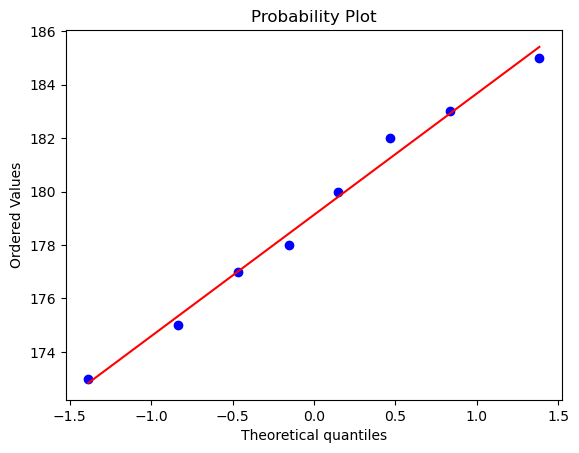

In [69]:
st.probplot(football_players, dist="norm", plot=plt)
plt.show()

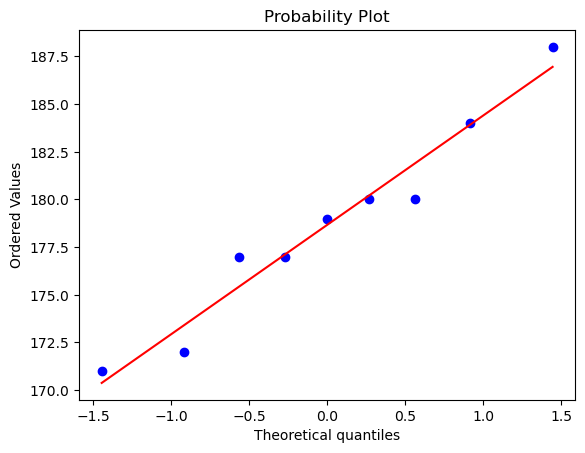

In [70]:
st.probplot(hockey_players, dist="norm", plot=plt)
plt.show()

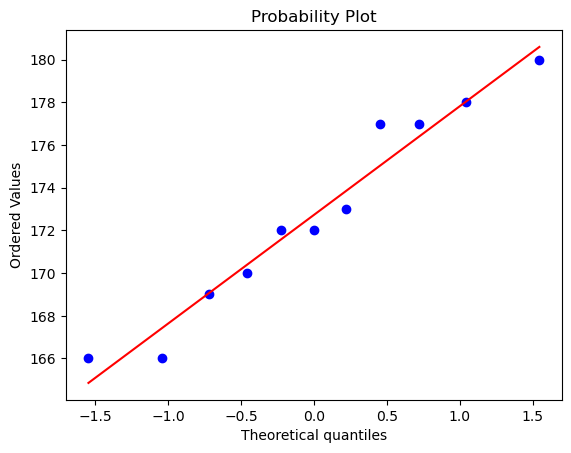

In [71]:
st.probplot(weightlifters, dist="norm", plot=plt)
plt.show()

    2c.Проверим форму распределения выборки
    Тест на ассиметрию 
    Нулевая гипотеза - выборка распределена симметрично
    Альтернативная гипотеза - выборка распределена несимметрично
    

In [72]:
def compare2 (a,p):
    if p>a:
        print("Выборка симметрична")
    else:
        print("Выборка несимметрична")
        


In [73]:
football_skew = st.skewtest(football_players)
print(football_skew)
compare2(alpha_1,football_skew[1])

SkewtestResult(statistic=-0.09413326454351585, pvalue=0.9250032964075097)
Выборка симметрична


In [74]:
hockey_skew = st.skewtest(hockey_players)
print(hockey_skew)
compare2(alpha_1,hockey_skew[1])

SkewtestResult(statistic=0.3227774854116799, pvalue=0.746863765148436)
Выборка симметрична


In [75]:
weightlifters_skew = st.skewtest(hockey_players)
print(hockey_skew)
compare2(alpha_1,hockey_skew[1])


SkewtestResult(statistic=0.3227774854116799, pvalue=0.746863765148436)
Выборка симметрична


3. Проверяем однородность (равенство дисперсий) и размерность выборок:


In [76]:
if len(football_players) == len(hockey_players) == len(weightlifters):
    print("Размерность выборок одинакова")
else:
    print("Размер выборок различен")

Размер выборок различен


In [77]:
#Используем тест Бартлетта —  для определения того, равны ли дисперсии между выборками:
bartlett_result = st.bartlett(football_players,hockey_players,weightlifters)
print(bartlett_result)
if bartlett_result[1] >alpha_1:
    print("Принимаем нулевую гипотезу, дисперсии выборок не имеют статистических отличий")
else:
    print("Принимаем альтернативную гипотезу, дисперсии различны")

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)
Принимаем нулевую гипотезу, дисперсии выборок не имеют статистических отличий


## Проводим дисперсионный анализ

















In [78]:
result_d_a = st.f_oneway(football_players,hockey_players,weightlifters)
print(result_d_a)
if result_d_a[1] > alpha_1:
    print("Принимаем нулевую гипотезу,статистических отличий нет")
else:
    print("Принимаем альтернативную гипотезу, есть статистические различия")


F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)
Принимаем альтернативную гипотезу, есть статистические различия


Проведем post hoc тест, для определения статистически значимых различий между выборками 
(в случае с неравенством размера выборок тест использует метод Тьюки-Крамера)

In [79]:
print(st.tukey_hsd(football_players,hockey_players,weightlifters))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.458     0.979    -5.357     6.273
 (0 - 2)      6.398     0.022     0.837    11.958
 (1 - 0)     -0.458     0.979    -6.273     5.357
 (1 - 2)      5.939     0.028     0.561    11.318
 (2 - 0)     -6.398     0.022   -11.958    -0.837
 (2 - 1)     -5.939     0.028   -11.318    -0.561



### Визуализация

Среднее значение:179.125, дисперсия: 16.982142857142858,
среднеквадратичное отклонение:4.120939559996343, медиана:179.0

Среднее значение:178.66666666666666, дисперсия: 28.499999999999996,
среднеквадратичное отклонение:5.338539126015656, медиана:179.0

Среднее значение:172.72727272727272, дисперсия: 23.01818181818182,
среднеквадратичное отклонение:4.797726734421399, медиана:172.0



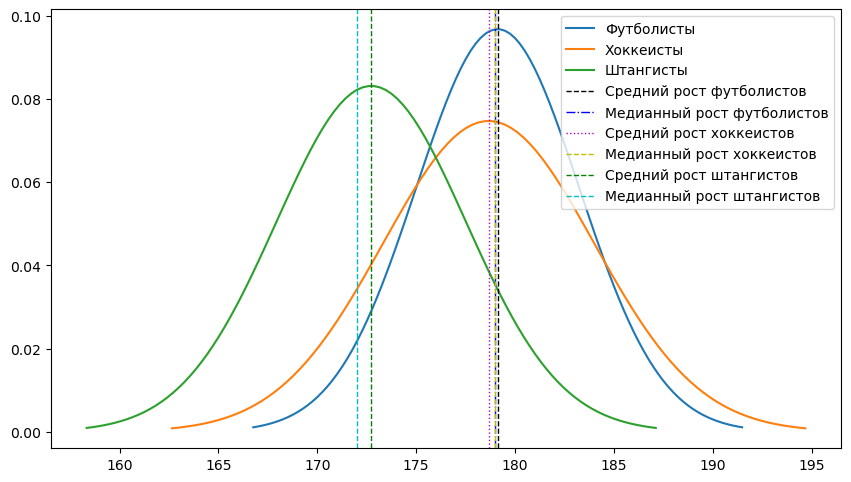

In [80]:
mean_football = np.mean(football_players)
var_football = np.var(football_players,ddof = 1)
sigma_football = np.sqrt(var_football)
median_football = np.median(football_players)
print(f'Среднее значение:{mean_football}, дисперсия: {var_football},\nсреднеквадратичное отклонение:{sigma_football}, медиана:{median_football}\n')


mean_hockey = np.mean(hockey_players)
var_hockey = np.var(hockey_players,ddof = 1)
sigma_hockey = np.sqrt(var_hockey)
median_hockey = np.median(hockey_players)
print(f'Среднее значение:{mean_hockey}, дисперсия: {var_hockey},\nсреднеквадратичное отклонение:{sigma_hockey}, медиана:{median_hockey}\n')


mean_weightlifters = np.mean(weightlifters)
var_weightlifters = np.var(weightlifters,ddof = 1)
sigma_weightlifters = np.sqrt(var_weightlifters)
median_weightlifters = np.median(weightlifters)
print(f'Среднее значение:{mean_weightlifters}, дисперсия: {var_weightlifters},\nсреднеквадратичное отклонение:{sigma_weightlifters}, медиана:{median_weightlifters}\n')



plt.figure(figsize=(10.2,5.7)) 

x_football = np.linspace(mean_football - 3*sigma_football, mean_football + 3*sigma_football, 100)
plt.plot(x_football, st.norm.pdf(x_football, mean_football, sigma_football),label = 'Футболисты')

x_hockey = np.linspace(mean_hockey - 3*sigma_hockey, mean_hockey + 3*sigma_hockey, 100)
plt.plot(x_hockey, st.norm.pdf(x_hockey, mean_hockey, sigma_hockey),label = 'Хоккеисты')

x_weightlifters = np.linspace(mean_weightlifters - 3*sigma_weightlifters, mean_weightlifters + 3*sigma_weightlifters, 100)
plt.plot(x_weightlifters, st.norm.pdf(x_weightlifters, mean_weightlifters, sigma_weightlifters),label = 'Штангисты')




plt.axvline(mean_football, color='k', linestyle='dashed', linewidth=1,label = 'Средний рост футболистов')
plt.axvline(median_football, color='b', linestyle='dashdot', linewidth=1,label = 'Медианный рост футболистов')

plt.axvline(mean_hockey, color='m', linestyle='dotted', linewidth=1, label = 'Средний рост хоккеистов')
plt.axvline(median_hockey, color='y', linestyle='dashed', linewidth=1,label = 'Медианный рост хоккеистов')

plt.axvline(mean_weightlifters, color='g', linestyle='dashed', linewidth=1 , label = 'Средний рост штангистов')
plt.axvline(median_weightlifters, color='c', linestyle='dashed', linewidth=1,label = 'Медианный рост штангистов')

plt.legend()
plt.show()

<AxesSubplot:>

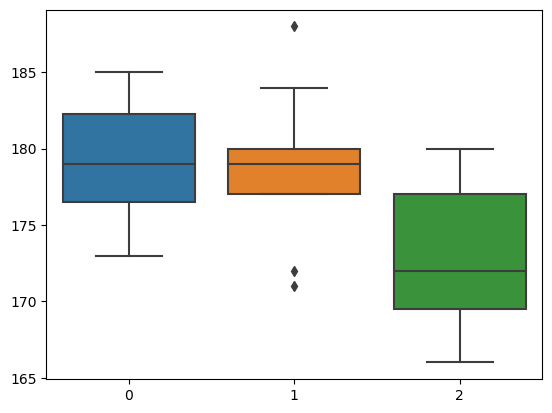

In [81]:
all_data = [football_players,hockey_players,weightlifters]
sns.boxplot(data = all_data)
